In [108]:
import os
import re
import nrrd

import numpy as np
import pandas as pd

from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy

from ioutil import relative_paths

#from skimage.measure import compare_ssim as ssim

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams, cycler
from matplotlib.colors import ListedColormap

%matplotlib inline

In [109]:
patient_id = np.load('./../../data_source/patient_id.npy')

In [110]:
paths_to_ct = relative_paths('./../../data_source/images/ct_nrrd', target_format='nrrd')
paths_to_pet = relative_paths('./../../data_source/images/pet_nrrd', target_format='nrrd')
paths_to_mask = relative_paths('./../../data_source/images/masks_nrrd', target_format='nrrd')

ct = {}
pet = {}
mask = {}
ct_cropped = {}
pet_cropped = {}

for num, path_to_ct in enumerate(paths_to_ct):
    
    ct_image, _ = nrrd.read(path_to_ct)
    ct[path_to_ct] = ct_image

    pet_image, _ = nrrd.read(paths_to_pet[num])
    pet[paths_to_pet[num]] = pet_image
    
    mask_image, _ = nrrd.read(paths_to_mask[num])
    mask[paths_to_mask[num]] = mask_image
    
    ct_cropped[path_to_ct] = ct[path_to_ct] * mask_image

    pet_cropped[paths_to_pet[num]] = pet[paths_to_pet[num]] * mask_image

# Thresholding bone

In [146]:
def gl_window(image, lower_thresh, upper_thresh):
    
    _image = np.copy(image)
    _image[image == 0] = np.mean(image)
    
    _image[image < lower_thresh] = 0
    _image[image > upper_thresh] = 0
 
    return _image

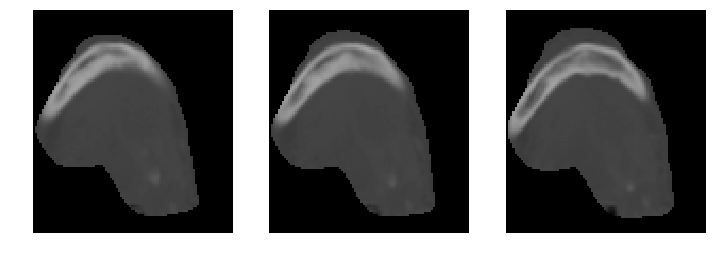

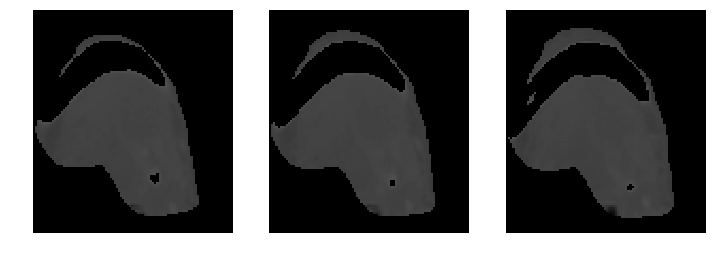

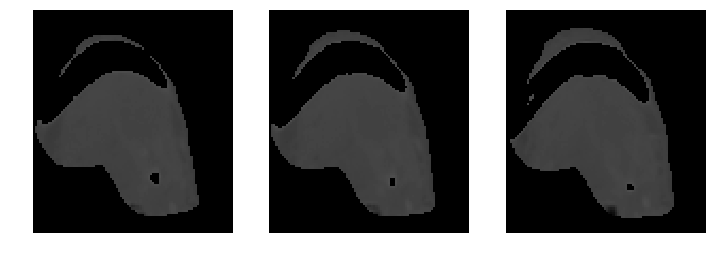

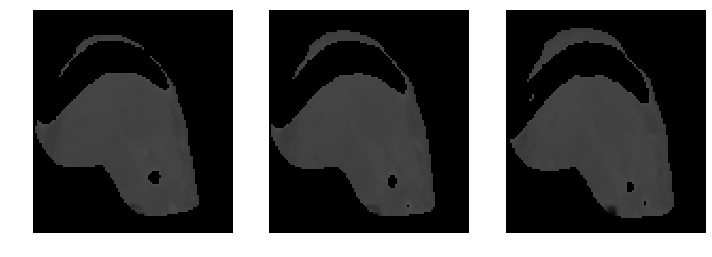

In [147]:
# NOTE
# * Empirically ID thresholds detecting artifacts CT slices 
# * Use 1300, 1200 for soft tissue on contrast CT (1300 is least aggresive). 
# * https://en.wikipedia.org/wiki/Hounsfield_scale
# * Link empirical threholds to median, mode and quantile statistics.


images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 49],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 52],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        images_to_plot[num],
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1300
lower_thresh = 10

images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 49],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 52],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1250
lower_thresh = 10
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 49],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 52],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1200
lower_thresh = 10
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 49],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 50],
    ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 52],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

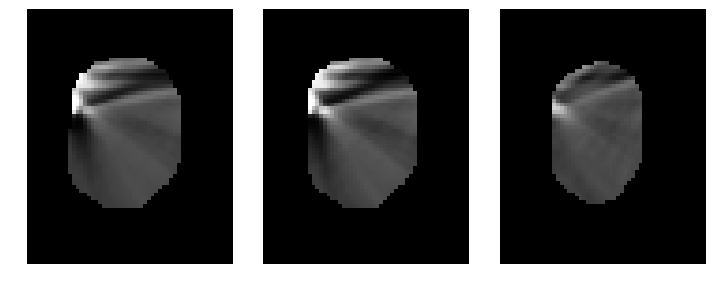

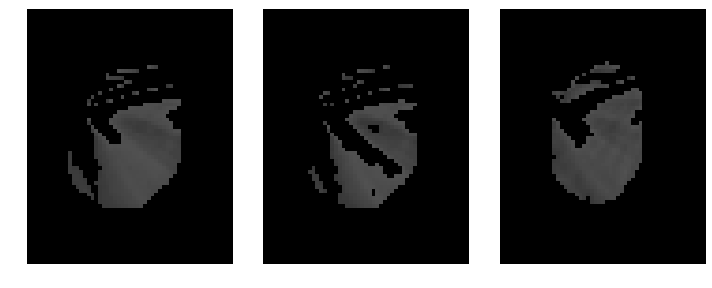

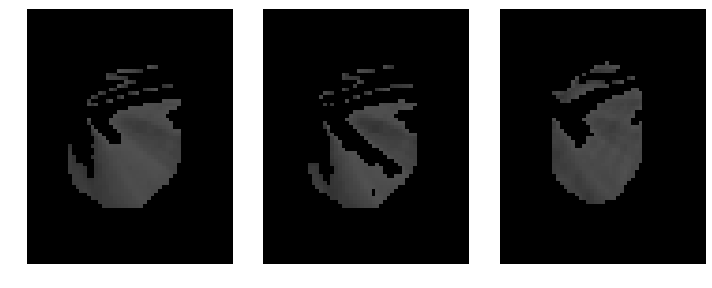

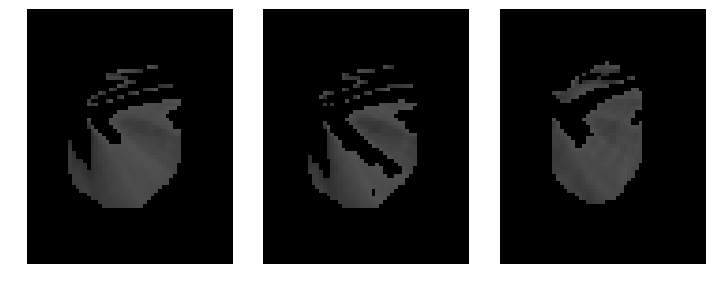

In [149]:
# CURRENT: 750-1300

# PLAN: 
# * Remove completely destroyed images (P038, P045, P082.
# * Empirically ID thresholds detecting artifacts CT slices.
# * Link empirical threholds to median, mode and quantile statistics.
#   - Compare emp. thresholds to median, mean, std and mode of analyzed images.


images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        images_to_plot[num],
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1300
lower_thresh = 900

images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()



# NOTE: 
# * Use 1300, 1200 for soft tissue on contrast CT (https://en.wikipedia.org/wiki/Hounsfield_scale).
upper_thresh = 1300
lower_thresh = 800

images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()


upper_thresh = 1300
lower_thresh = 750
images_to_plot = [    
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 59],
    ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 61],
]
fig, axes = plt.subplots(nrows=int(len(images_to_plot) / 3), ncols=3, figsize=(10, 10))
for num, axis in enumerate(axes.ravel()):
    # Resize images to tumor volume region.
    axis.imshow(
        #gl_threshold(images_to_plot[num], thresh), 
        gl_window(images_to_plot[num], lower_thresh, upper_thresh),
        cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    )
    vmin=np.min(images_to_plot[num]),
    vmax=np.max(images_to_plot[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

# GL Median Mode Inferring Window Settings

In [151]:
def gl_median_mode(image):
    
    _image = np.copy(image)
    _image = _image[image != 0]
    
    mode, _ = stats.mode(_image, axis=None)
    return {
        'gl_mean': np.mean(_image),
        'gl_median': np.median(_image),
        'gl_mode': float(mode),
    }

In [152]:
# Parameters:
# * The window level (WL)/window center, is the midpoint of the range of the CT numbers displayed.
# * The window width (WW) is the measure of the range of CT numbers that an image contains.

# Complete image statistics. 
ct_median_mode, pet_median_mode = {}, {}
for num, (pet_image, ct_image) in enumerate(zip(pet.values(), ct.values())):
  
    pet_median_mode[num] = gl_median_mode(pet_image)
    ct_median_mode[num] = gl_median_mode(ct_image)
    
# Cropped image statistics.
ct_cropped_median_mode, pet_cropped_median_mode = {}, {}
for num, (cropped_pet_image, cropped_ct_image) in enumerate(zip(pet_cropped.values(), ct_cropped.values())):
    
    pet_cropped_median_mode[num] = gl_median_mode(cropped_pet_image)
    ct_cropped_median_mode[num] = gl_median_mode(cropped_ct_image)
    
    
df_ct_median_mode = pd.DataFrame(ct_median_mode)
df_ct_cropped_median_mode = pd.DataFrame(ct_cropped_median_mode)

df_pet_median_mode = pd.DataFrame(pet_median_mode)
df_pet_cropped_median_mode = pd.DataFrame(pet_cropped_median_mode)

df_ct_median_mode.columns = patient_id
df_ct_cropped_median_mode.columns = patient_id

df_pet_median_mode = patient_id
df_pet_cropped_median_mode.columns = patient_id

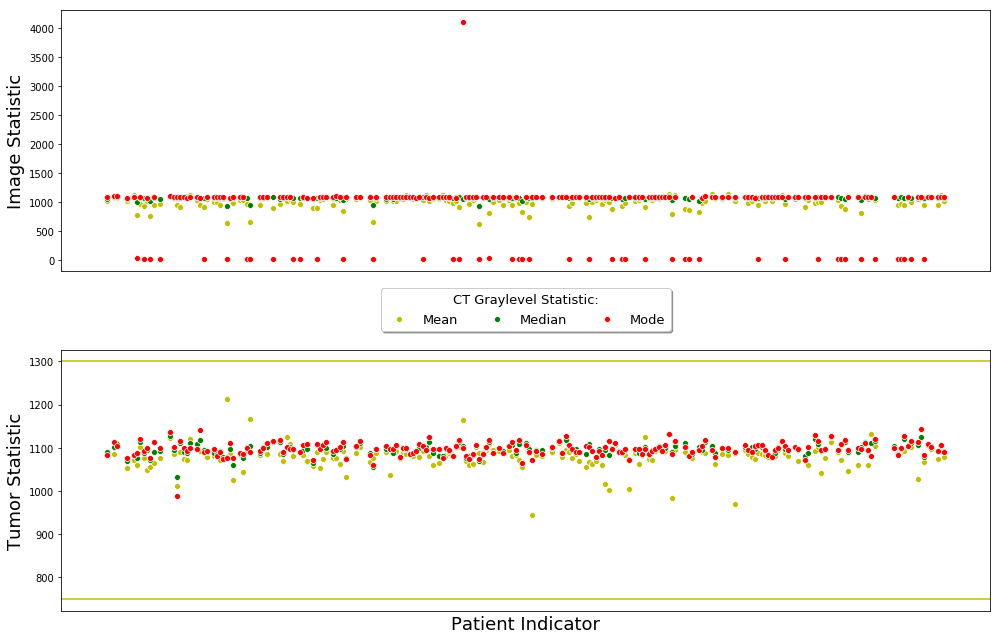

In [156]:
# Observations:
# * Median (considering cropped tumor volume in windowing) appears to be most stable statistic compared to mode 
#   and mean.

rcParams['axes.prop_cycle'] = cycler(color=['y', 'g', 'r'])
fig, (image_axis, cropped_axis) = plt.subplots(
    nrows=2, sharex=True, figsize=(14, 9)
)
labels = ['Mean', 'Median', 'Mode']
for num, (ct_cropped_row_label, ct_row_label) in enumerate(zip(df_ct_cropped_median_mode.T, df_ct_median_mode.T)):
    # Plot image stats.
    sns.scatterplot(
        x=np.squeeze(df_ct_median_mode.columns.values), 
        y=np.squeeze(df_ct_median_mode.loc[ct_row_label, :].values),
        ax=image_axis,
    )
    # Plot tupr stats.
    sns.scatterplot(
        x=np.squeeze(df_ct_cropped_median_mode.columns.values), 
        y=np.squeeze(df_ct_cropped_median_mode.loc[ct_cropped_row_label, :].values),
        ax=cropped_axis,
        label=labels[num]
    )
cropped_axis.legend(
    title='CT Graylevel Statistic:',
    title_fontsize=13,
    fontsize=13, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.26),
    ncol=4, 
    fancybox=True, 
    shadow=True
)
image_axis.set_ylabel('Image Statistic', fontsize=18)
cropped_axis.set_ylabel('Tumor Statistic', fontsize=18)
plt.xlabel('Patient Indicator', fontsize=18)
plt.xticks([])

cropped_axis.axhline(y=1300)
cropped_axis.axhline(y=750)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.savefig(
    './ct_median_model.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

In [155]:
# NOTE: Median is the statistic with the smallest STD across cropped CT scans compared to mean and mode.

print(np.std(df_ct_cropped_median_mode.loc['gl_mean', :]))
print(np.std(df_ct_cropped_median_mode.loc['gl_median', :])) 
print(np.std(df_ct_cropped_median_mode.loc['gl_mode', :]))

28.365603912350053
13.329979903627521
15.942900203268719


In [159]:
def mad(X):
    
    return np.median(np.abs(X - np.median(X)))

In [180]:
img_bone = ct_cropped['./../../data_source/images/ct_nrrd/P038CT.nrrd'][15:-15, 20:-10, 49]
img_streaks = ct_cropped['./../../data_source/images/ct_nrrd/P164CT.nrrd'][15:-15, 15:-10, 58]

img_bone = img_bone[img_bone != 0]
img_streaks = img_streaks[img_streaks != 0]

median_bone = np.median(img_bone)
media_streaks = np.median(img_streaks)

mad_bone = mad(img_bone)
mad_streaks = mad(img_streaks)

median_bone, media_streaks, mad_bone, mad_streaks

(1077.8443580529488, 1181.7294575417716, 29.336962005035502, 178.2404440375372)

# Inspecting Samples with Extreme Statitics

In [81]:
# NOTE: Patient ID is set as column labels.
np.where(df_ct_median_mode.loc['gl_mode', :] > 3000)

(array([83]),)

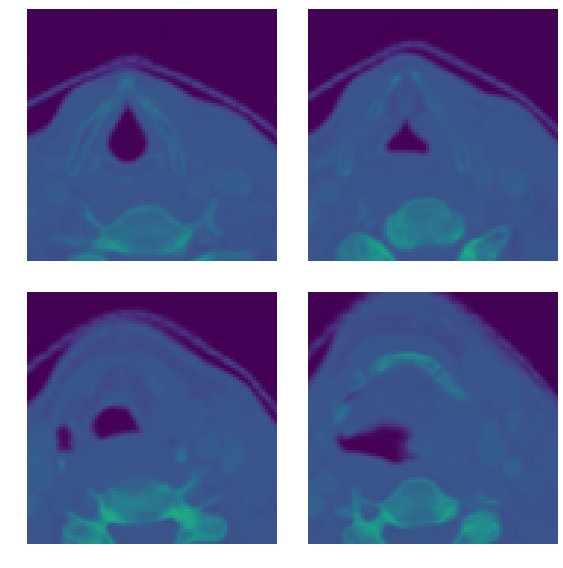

In [92]:
# Inspecting image with highest mode value.
images_to_plot = [
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 10],
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 20],
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 30],
    ct['./../../data_source/images/ct_nrrd/P083CT.nrrd'][:, :, 40],
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for num, axis in enumerate(axes.ravel()):
    axis.imshow(
        images_to_plot[num], #cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    ),
    #axis.set_title(titles[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

In [94]:
# NOTE: Patient ID is set as column labels.
np.where(df_ct_cropped_median_mode.loc['gl_mode', :] < 1000)

(array([14]),)

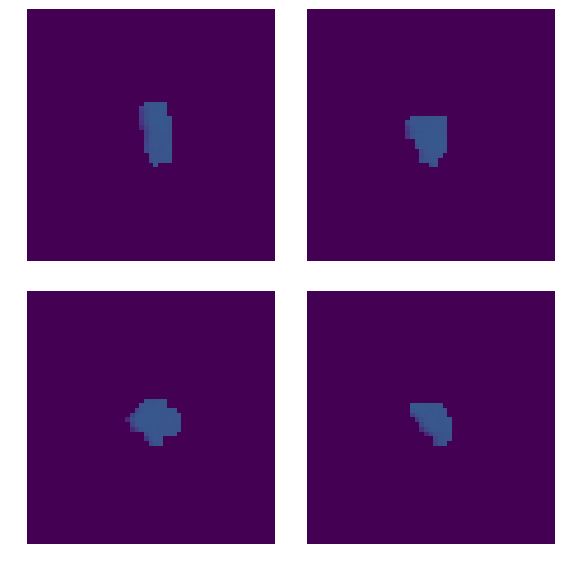

In [101]:
# Inspecting image with lowest mode value.
images_to_plot = [
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 20],
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 27],
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 35],
    ct_cropped['./../../data_source/images/ct_nrrd/P014CT.nrrd'][:, :, 40],
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for num, axis in enumerate(axes.ravel()):
    axis.imshow(
        images_to_plot[num], #cmap=plt.cm.gray,
        vmin=0,
        vmax=2**12,
    ),
    #axis.set_title(titles[num])
    axis.axis('off')   
#plt.subplots_adjust(wspace=0, hspace=0.2)
plt.tight_layout()

# GL percentiles

In [103]:
def gl_percentiles(image):
        
    # Remove zeros from the image since it distrupts 
    # percentile statistics.
    _tmp = image[image != 0].ravel()
    return {
        #'percentile_95': np.percentile(_tmp, 95),
        'percentile_90': np.percentile(_tmp, 90),
        #'percentile_85': np.percentile(_tmp, 85),
        'percentile_80': np.percentile(_tmp, 80),
        #'percentile_75': np.percentile(_tmp, 75),
        'percentile_70': np.percentile(_tmp, 70),
        #'percentile_65': np.percentile(_tmp, 55),
        'percentile_60': np.percentile(_tmp, 50),
    }

In [104]:
# Histogram statistics on tumor (not cropped) images.
ct_cropped_quant, pet_cropped_quant = {}, {}
for num, (pet_image, ct_image) in enumerate(zip(pet_cropped.values(), ct_cropped.values())):
    
    pet_cropped_quant[num] = gl_percentiles(pet_image)
    ct_cropped_quant[num] = gl_percentiles(ct_image)

# Sanity check: Adjusting to Python counting logic.
assert num == np.size(patient_id) - 1

df_ct_cropped_quant = pd.DataFrame(ct_cropped_quant)
df_pet_cropped_quant = pd.DataFrame(pet_cropped_quant)

df_ct_cropped_quant.columns = patient_id
df_pet_cropped_quant.columns = patient_id

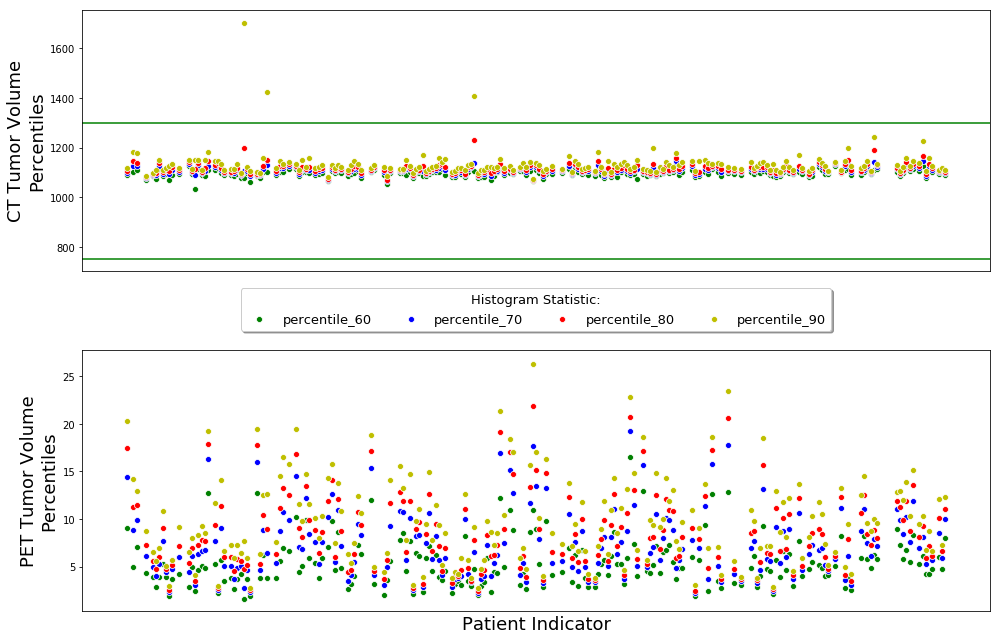

In [158]:
# Purpose:
# * Motivate a threshold signifying presence of artifacts.

# A percentile (or a centile) is a measure used in statistics indicating the value below which a 
# given percentage of observations in a group of observations falls. For example, the 20th percentile 
# is the value (or score) below which 20% of the observations may be found.  
# Plot CT image and tumor GL histogram stats. 

# Observations: 
# * One patient distriguished by large 95th percentile. Image stack contains much straking artifacts.
# * All but 90th percentile is within 750-1300 limit.

labels = pd.DataFrame(ct_cropped_quant).index
colours = ['g', 'b', 'r', 'y', 'm', 'k', 'c']
rcParams['axes.prop_cycle'] = cycler(color=colours[:len(labels)])

fig, (ct_axis, pet_axis) = plt.subplots(nrows=2, sharex=True, figsize=(14, 9))
for num, (ct_row_label, pet_row_label) in enumerate(zip(df_ct_cropped_quant.T, df_pet_cropped_quant.T)):
    sns.scatterplot(
        x=np.squeeze(df_ct_cropped_quant.columns.values), 
        y=np.squeeze(df_ct_cropped_quant.loc[ct_row_label].values),
        ax=ct_axis,
    )
    sns.scatterplot(
        x=np.squeeze(df_pet_cropped_quant.columns.values), 
        y=np.squeeze(df_pet_cropped_quant.loc[pet_row_label].values),
        ax=pet_axis,
        label=labels[num]
    )

pet_axis.legend(
    title='Histogram Statistic:',
    title_fontsize=13,
    fontsize=13, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.26),
    ncol=6, 
    fancybox=True, 
    shadow=True
)
ct_axis.set_ylabel('CT Tumor Volume\nPercentiles', fontsize=18)
#ct_axis.axhline(y=1250, c='k')
pet_axis.set_ylabel('PET Tumor Volume\nPercentiles', fontsize=18)
plt.xlabel('Patient Indicator', fontsize=18)
plt.xticks([])

ct_axis.axhline(y=1300)
ct_axis.axhline(y=750)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig(
    './pet_ct_percentiles.png',
    bbox_inches='tight',
    transparent=True,
    dpi=100, 
)

# Hierarchical Clustering of Quantiles

In [88]:
# See: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Selecting-a-Distance-Cut-Off-aka-Determining-the-Number-of-Clusters
def fancy_dendrogram(*args, **kwargs):
    
    max_d = kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
        
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        #plt.title('Hierarchical Clustering Dendrogram (truncated)')
        #plt.xlabel('sample index or (cluster size)')
        #plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                #plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                #             textcoords='offset points',
                #             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    
    return ddata

['g', 'g', 'g', 'g', 'g', 'r', 'b']
['g', 'g', 'g', 'g', 'g', 'g', 'b']
['g', 'g', 'g', 'g', 'g', 'g', 'b']
['g', 'g', 'g', 'g', 'g', 'r', 'b']


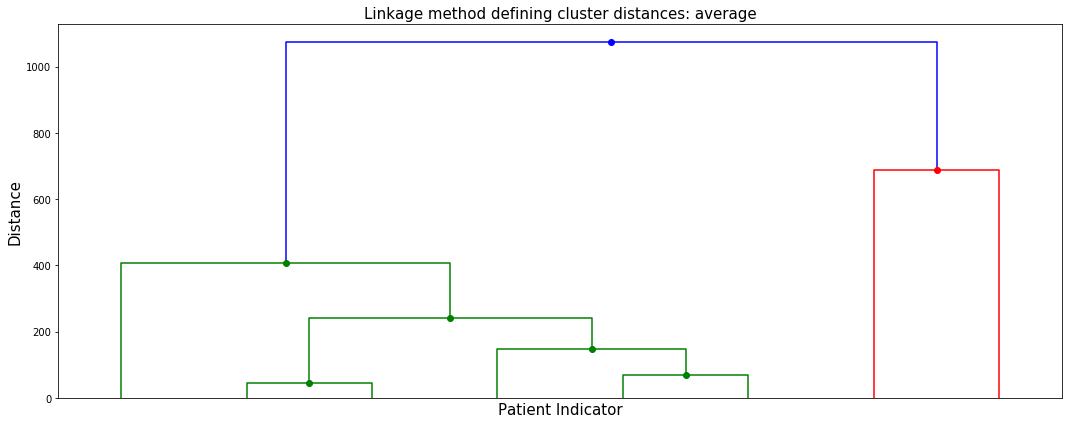

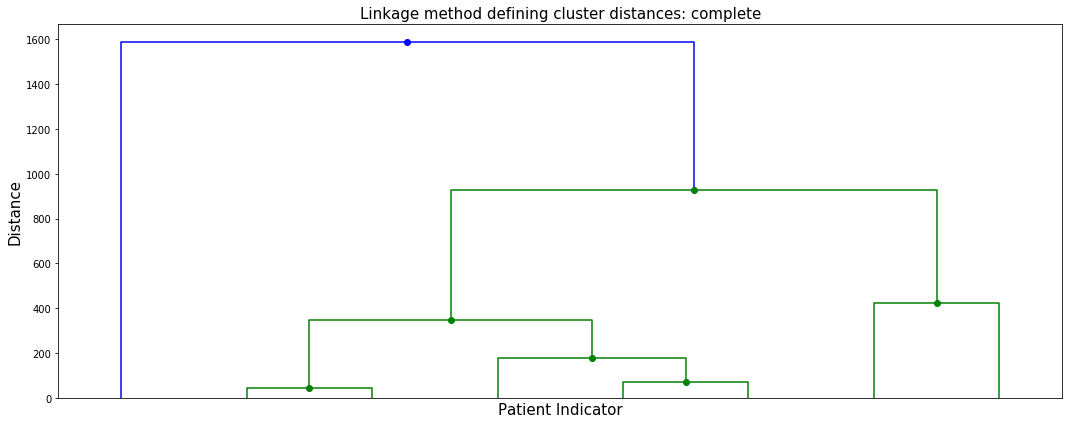

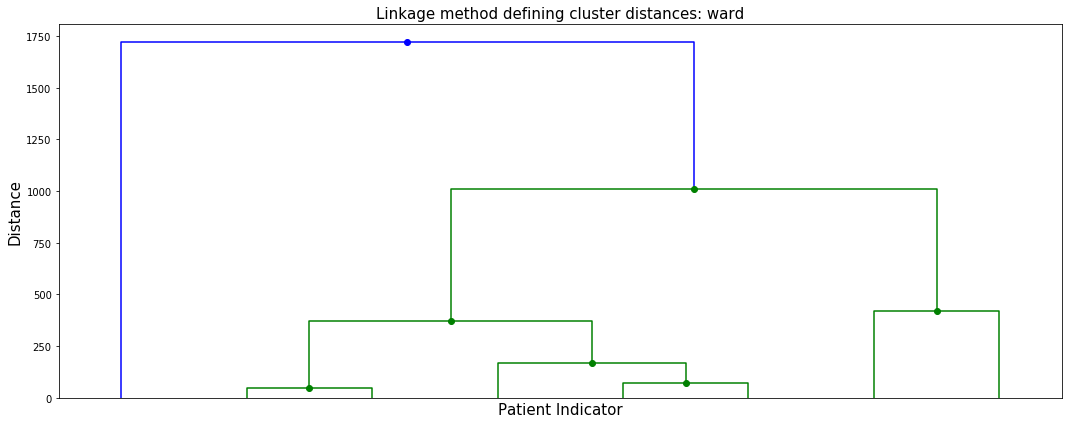

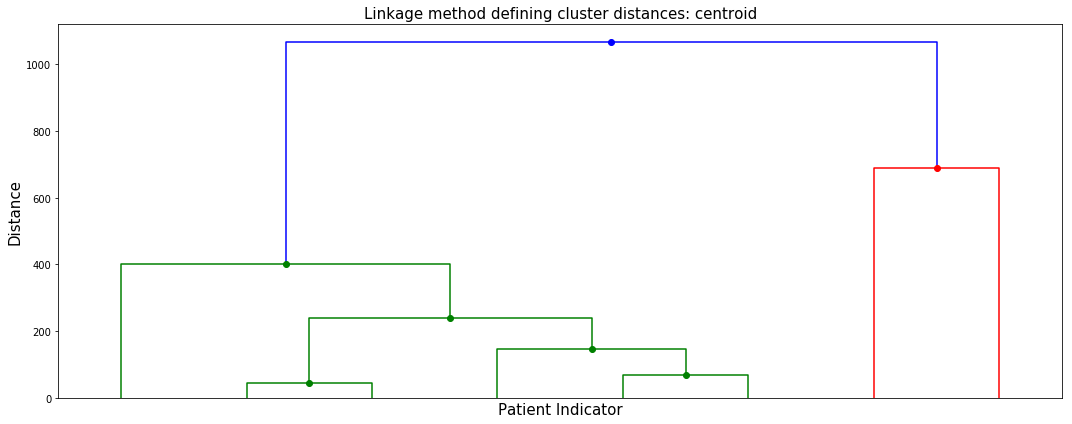

In [94]:
# Purpose:
# * Apply hierarchical clustering to image GL quantiles in detecting a threshold from images containing 
#   much larger GL values than others. Further motivates the choice of threshold value.

mat = df_ct_cropped_quant
# A huge jump in distance may be used to argue a certain number of clusters. 
max_dist = 0.4

# Suggests between 

methods = [
    'average', 'complete', 'ward', 'centroid', 
]
for method in methods:

    plt.figure(figsize=(15, 6))
    plt.title(f'Linkage method defining cluster distances: {method}', fontsize=15)
    plt.xlabel('Patient Indicator', fontsize=15)
    plt.ylabel('Distance', fontsize=15)

    row_linkage = hierarchy.linkage(distance.pdist(mat), method=method)
    col_linkage = hierarchy.linkage(distance.pdist(np.transpose(mat)), method=method)
    
    output = fancy_dendrogram(
        #col_linkage,
        row_linkage,
        leaf_rotation=90.0,  
        leaf_font_size=8.0, 
        #annotate_above=10,
        #max_d=max_dist,
    )
    plt.xticks([], [])
    plt.tight_layout()
    
    """
    'percentile_60',
     'percentile_65',
     'percentile_70',
     'percentile_75',
     'percentile_80',
     'percentile_85',
     'percentile_90',
     'percentile_95'

    """
    
    print(list(output['color_list']))